In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 5]


In [1]:
364*20/7

1040.0

In [67]:
metrics = pd.read_csv('data/metrics.csv', sep=';')
res_local = pd.read_csv('data/results_v2.csv', sep=';')
res_wifi_cloud = pd.read_csv('data/results_v2_wifi_aws_1.csv', sep=';')
res_wifi_pc = pd.read_csv('data/results_v2_wifi_pc_bartosz_1.csv', sep=';')
res_cellular_cloud = pd.read_csv('data/results_v2_cell_aws_1.csv', sep=';')

file_names = sorted(metrics.file_name.unique())

In [68]:
def aggregate_file_info(file_info):
    return dict(
        file_name=file_info.file_name[0],
        time_mean=file_info.time.mean(),
        time_std=file_info.time.std(),
        battery=(max(file_info.battery) - min(file_info.battery))/len(file_info),
        where=file_info.connection[0] + '_' + file_info.service[0],
        connection=file_info.connection[0],
        service=file_info.service[0]
    )

def get_metric(file_info, metrics):
    file_name = file_info.file_name[0]
    metric = metrics[metrics.file_name == file_name]
    return dict(
        metric=int(metric.metric),
        x=int(metric.x),
        y=int(metric.y),
        file_size=int(metric.file_size)
    )

def get_full_file_info(file_info, metrics):
    return pd.DataFrame({**aggregate_file_info(file_info), **get_metric(file_info, metrics)}, index=[0])

def get_processed_dataset_for(dataset, metrics, file_names):
    return pd.concat([get_full_file_info(dataset[dataset.file_name == file_name].reset_index(drop=True), metrics) for file_name in file_names], ignore_index=True)

In [69]:
local_processed = get_processed_dataset_for(res_local, metrics, file_names).sort_values('metric').head(96)
cloud_wifi_processed = get_processed_dataset_for(res_wifi_cloud, metrics, file_names).sort_values('metric').head(96)
pc_wifi_processed = get_processed_dataset_for(res_wifi_pc, metrics, file_names).sort_values('metric').head(96)
cloud_cell_processed = get_processed_dataset_for(res_cellular_cloud, metrics, file_names).sort_values('metric').head(96)

<AxesSubplot:xlabel='metric', ylabel='time_mean'>

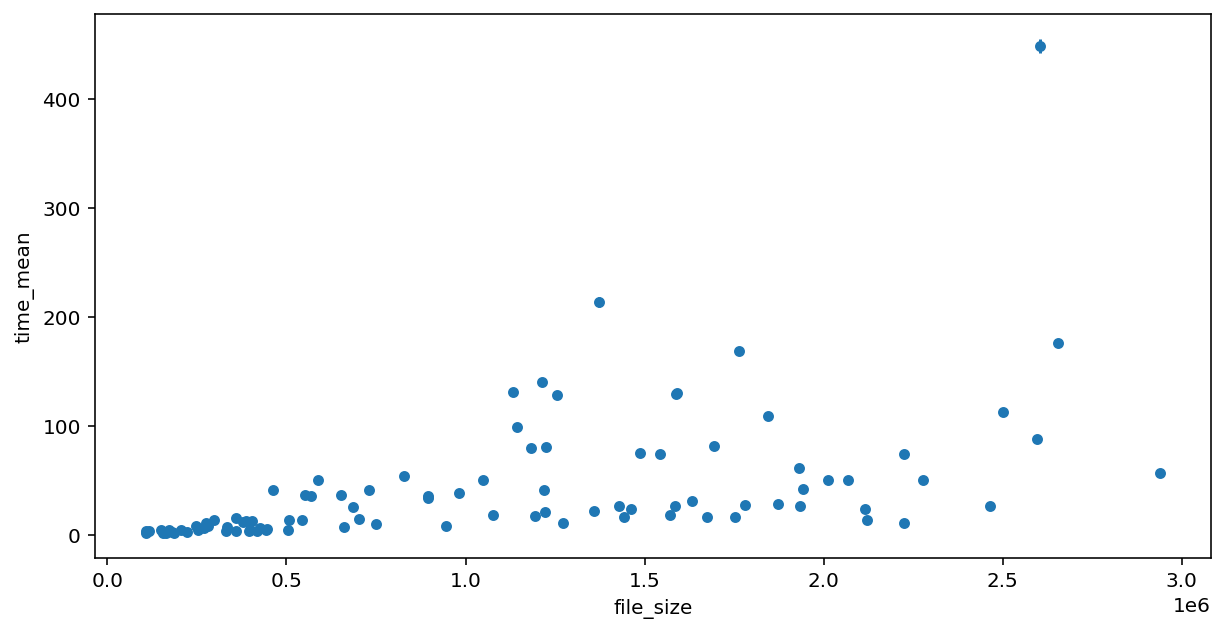

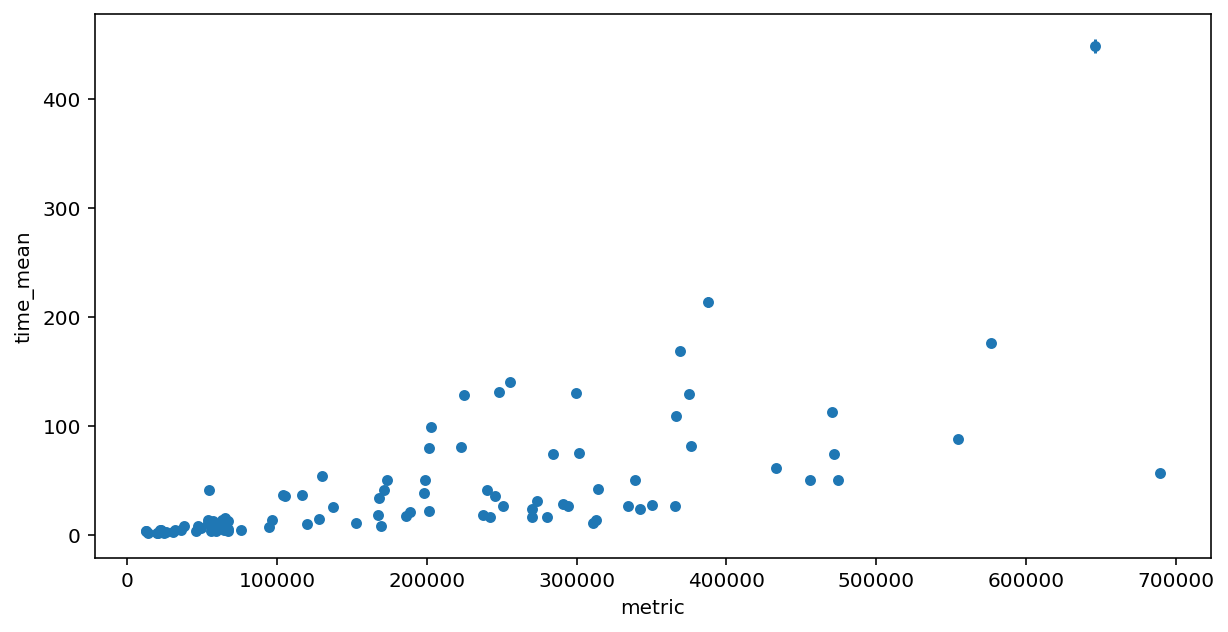

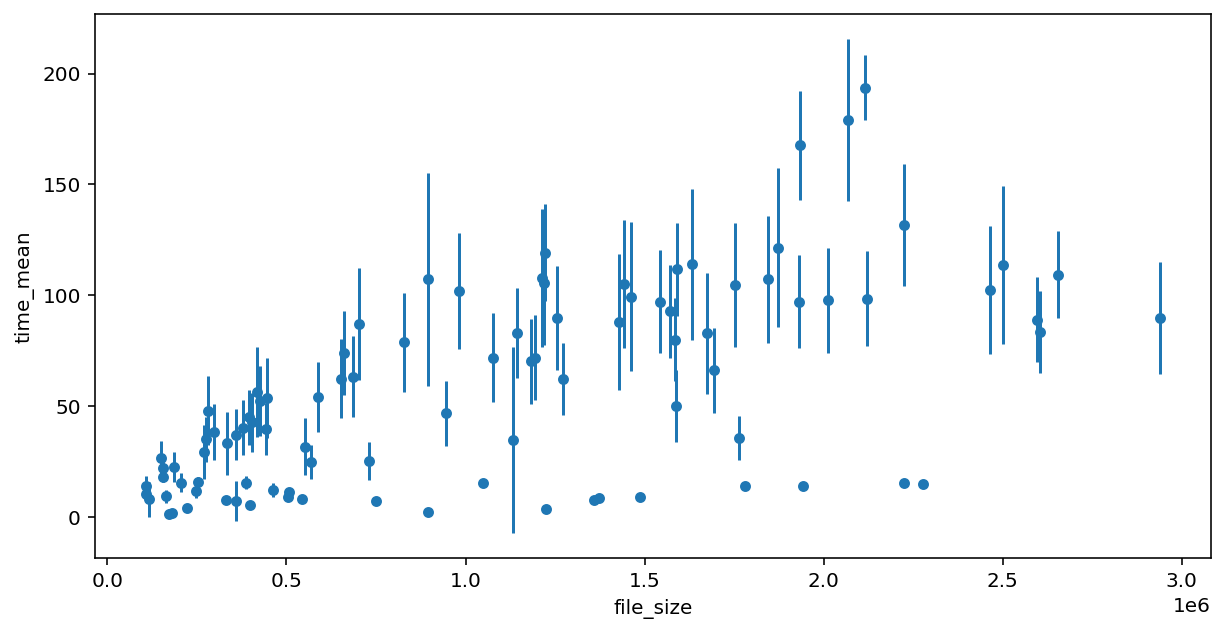

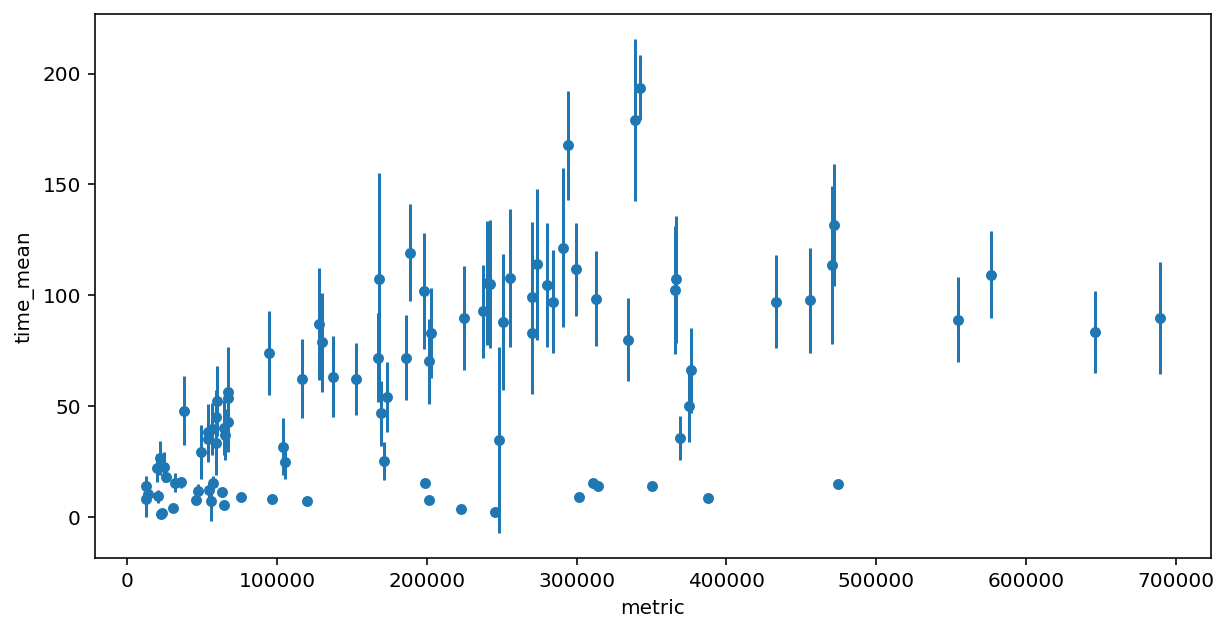

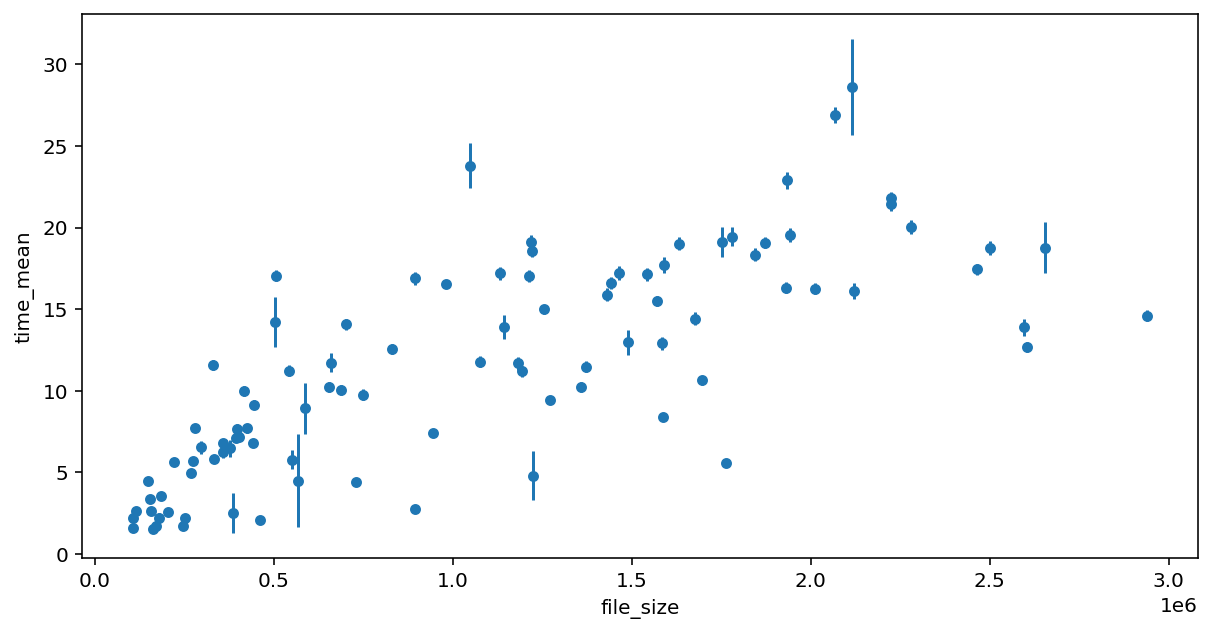

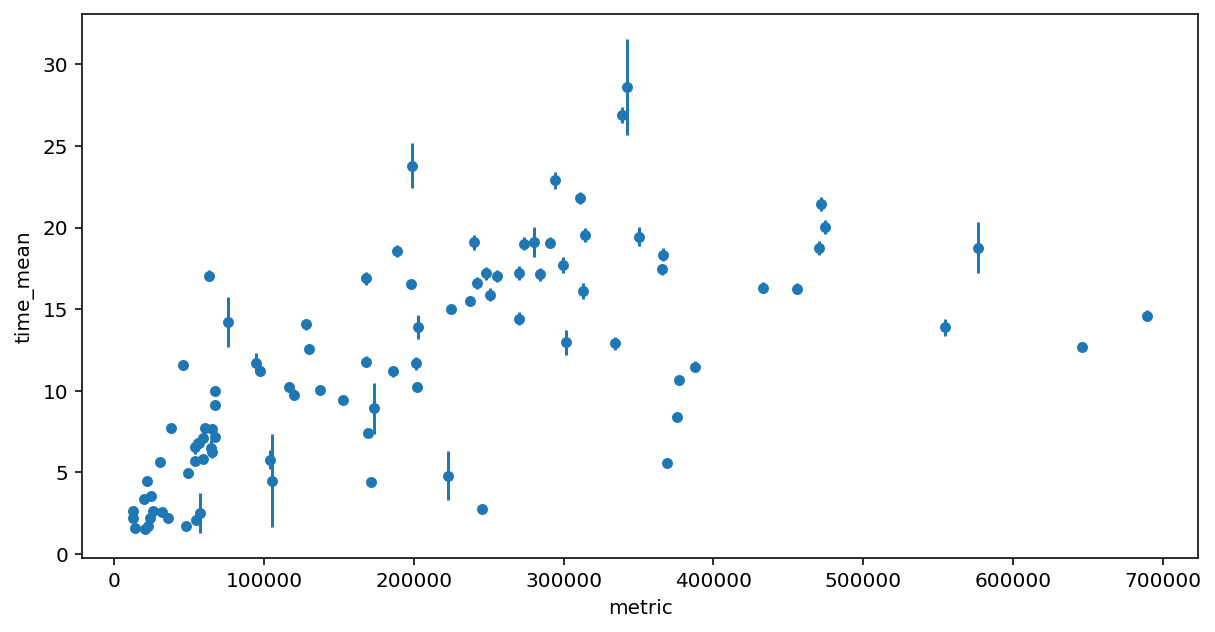

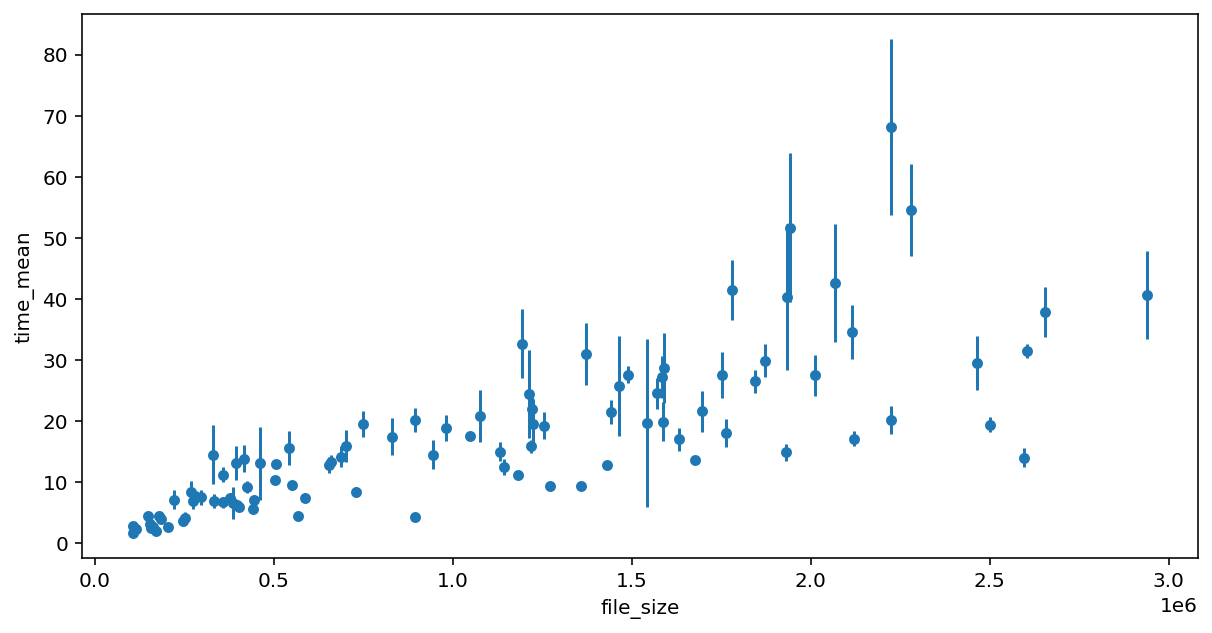

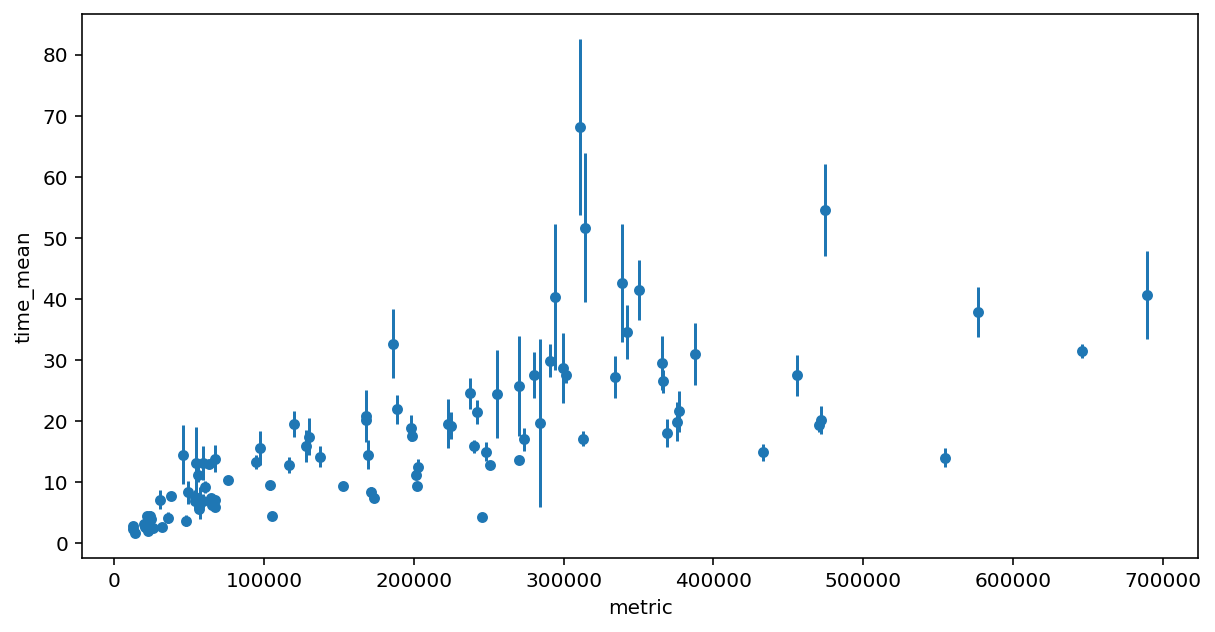

In [70]:
local_processed.plot(x='file_size', y='time_mean', yerr='time_std', kind='scatter')
local_processed.plot(x='metric', y='time_mean', yerr='time_std', kind='scatter')


cloud_wifi_processed.plot(x='file_size', y='time_mean', yerr='time_std', kind='scatter')
cloud_wifi_processed.plot(x='metric', y='time_mean', yerr='time_std', kind='scatter')

pc_wifi_processed.plot(x='file_size', y='time_mean', yerr='time_std', kind='scatter')
pc_wifi_processed.plot(x='metric', y='time_mean', yerr='time_std', kind='scatter')

cloud_cell_processed.plot(x='file_size', y='time_mean', yerr='time_std', kind='scatter')
cloud_cell_processed.plot(x='metric', y='time_mean', yerr='time_std', kind='scatter')

In [13]:
local_processed

,file_name,time_mean,time_std,battery,where,connection,service,metric,x,y,file_size
11,1558_040.2B.jpg,3.129325,0.035850,0.025000,none_mobile,none,mobile,12231,1712,2200,115885
28,5964_089.2B.jpg,3.260029,0.028870,0.029412,none_mobile,none,mobile,12369,1704,2200,108633
15,1788_060.2B.jpg,1.910361,0.029304,0.016393,none_mobile,none,mobile,13857,1712,2200,106640
3,1090_030.2B.jpg,1.783217,0.048152,0.016667,none_mobile,none,mobile,19603,1712,2200,154347
14,1717_111.2B.jpg,1.957686,0.124067,0.019608,none_mobile,none,mobile,20617,2208,1700,164510
...,...,...,...,...,...,...,...,...,...,...,...
65,8336_057.3A.jpg,50.553200,0.595839,0.400000,none_mobile,none,mobile,474651,2552,3300,2278690
91,9530_011.4B.jpg,87.485000,1.571515,0.600000,none_mobile,none,mobile,554461,3400,4400,2596897
72,8347_020.3A.jpg,175.885200,1.620829,1.200000,none_mobile,none,mobile,576427,2552,3300,2653650
80,8360_037.3A.jpg,448.610800,6.715762,3.800000,none_mobile,none,mobile,645883,2552,3300,2603236


In [32]:
pd.concat([local_processed, cloud_wifi_processed, pc_wifi_processed, cloud_cell_processed], ignore_index=True).to_csv('learning_data_new_dataset_no_outlier_no_zero_battery.csv', sep=';', index=False)

In [27]:
res_cellular_cloud[res_cellular_cloud['file_name'] == '1208_004.2B.jpg'].time.sum()

280.485

In [28]:
cloud_cell_processed.sort_values('time_std').tail(10)

,file_name,time_mean,time_std,battery,where,connection,service,metric,x,y,file_size
22,5348_026.2B.jpg,13.017000,6.019457,0.200000,cellular_cloud,cellular,cloud,54337,1712,2200,462136
18,2007_071.2B.jpg,24.391889,7.204524,0.111111,cellular_cloud,cellular,cloud,255753,1712,2200,1212950
75,8347_104.3A.jpg,40.663200,7.214629,0.200000,cellular_cloud,cellular,cloud,689709,2552,3300,2939906
65,8336_057.3A.jpg,54.543000,7.537414,0.200000,cellular_cloud,cellular,cloud,474651,2552,3300,2278690
68,8340_051.3A.jpg,25.759429,8.205262,0.142857,cellular_cloud,cellular,cloud,270445,2552,3300,1463437
54,8311_057.3A.jpg,42.553200,9.687086,0.200000,cellular_cloud,cellular,cloud,338821,2552,3300,2068036
62,8329_070.3A.jpg,40.315400,11.931180,0.200000,cellular_cloud,cellular,cloud,294518,2552,3300,1933011
69,8341_019.3A.jpg,51.637800,12.243474,0.400000,cellular_cloud,cellular,cloud,314427,2552,3300,1942751
59,8320_024.3A.jpg,19.606467,13.828249,0.066667,cellular_cloud,cellular,cloud,284181,2552,3300,1542530
93,9540_040.4B.jpg,68.121800,14.482437,0.400000,cellular_cloud,cellular,cloud,311091,3400,4400,2224932


In [29]:
res_cellular_cloud[res_cellular_cloud['file_name'] == '9540_040.4B.jpg'].time.sum()

340.609

In [30]:
195.918/27

7.256222222222222

In [31]:
res_cellular_cloud[res_cellular_cloud['file_name'] == '9540_040.4B.jpg'].time.sum()

340.609